## 워드 클라우드

### 워드 클라우드(Word Cloude)

- 빈도수를 기반으로 크기가 결정됨
- 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트의 내용을 파악하는 데 도움이 됨

In [2]:
! pip install wordcloud

In [3]:
from konlpy.corpus import kolaw
fids = kolaw.fileids()
fobj = kolaw.open(fids[0])
print(fobj.read(140))

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모


In [4]:
fobj = kolaw.open(fids[0])
ko_doc = fobj.read()

### 워드 클라우드 사용법

1. wordcloud import 하기


2. wordcloud 객체 생성
    - 1) font_path: *string*
    - 2) max_words: *number(default=200)*
    - 3) background_color: *color value(default='black')*
    - 4) mask: *nd-array or None(default=None)*


3. `generate()`
    - generate() 혹은 generate_from_text() : 텍스트 그대로 넘겨주는 방법 -> 빈도수 계산
    - generate_from_frequencies() : 미리 계산된 단어의 빈도수/중요도를 넘겨줌
    
    
4. 한글 폰트 경로: font_path

In [5]:
from wordcloud import WordCloud

In [6]:
wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\batang.ttc')
wc = wc.generate(ko_doc)

5. interpolation: 보간법의 흐림 현상 (인접 픽셀을 참조하여 픽셀 생성)

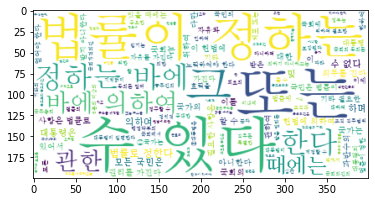

In [7]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.show()

6. `generate_from_frequencies()`
    - generate() 혹은 generate_from_text() : 텍스트 그대로 넘겨주는 방법 -> 빈도수 계산
    - generate_from_frequencies() : 미리 계산된 단어의 빈도수/중요도를 넘겨줌
    
    
7. Counter()

In [8]:
from collections import Counter

wc = WordCloud(background_color='white', max_words=200, font_path=r'C:\Windows\Fonts\batang.ttc')
count = Counter(ko_doc.split())
wc = wc.generate_from_frequencies(count)
count

Counter({'대한민국헌법': 1,
         '유구한': 1,
         '역사와': 1,
         '전통에': 1,
         '빛나는': 1,
         '우리': 1,
         '대한국민은': 1,
         '3·1운동으로': 1,
         '건립된': 1,
         '대한민국임시정부의': 1,
         '법통과': 1,
         '불의에': 1,
         '항거한': 1,
         '4·19민주이념을': 1,
         '계승하고,': 1,
         '조국의': 3,
         '민주개혁과': 1,
         '평화적': 4,
         '통일의': 1,
         '사명에': 1,
         '입각하여': 1,
         '정의·인도와': 1,
         '동포애로써': 1,
         '민족의': 1,
         '단결을': 1,
         '공고히': 1,
         '하고,': 2,
         '모든': 30,
         '사회적': 2,
         '폐습과': 1,
         '불의를': 1,
         '타파하며,': 1,
         '자율과': 1,
         '조화를': 2,
         '바탕으로': 1,
         '자유민주적': 2,
         '기본질서를': 1,
         '더욱': 1,
         '확고히': 1,
         '하여': 1,
         '정치·경제·사회·문화의': 1,
         '영역에': 2,
         '있어서': 9,
         '각인의': 1,
         '기회를': 2,
         '균등히': 1,
         '능력을': 1,
         '최고도로': 1,
         '발휘하게': 1,
         '하며,': 18,
   

8. most_common(숫자)

In [9]:
count.most_common(20)

[('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다.', 57),
 ('한다.', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('모든', 30),
 ('법률로', 30),
 ('정한다.', 28),
 ('위하여', 26),
 ('가진다.', 25),
 ('아니한다.', 25),
 ('및', 25)]

9. 빈도순으로 추출한 내용 넘겨주기
    - `generate_from_frequencies()`

In [11]:
# 앞 내용 수정
# max OS : '/Library/Fonts/NanumBarunGothic.ttf'

wc = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Windows\Fonts\batang.ttc')
count = Counter(ko_doc.split())
wc = wc.generate_from_frequencies(count)

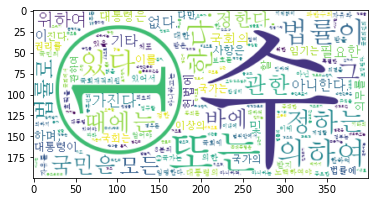

In [12]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 의미 없는 단어 처리하기

### 1. 명사만 추출하기

* Okt 이용하여 명사 추출하기

In [13]:
from konlpy.tag import Okt
okt = Okt()

In [14]:
ko_doc_noun = okt.nouns(ko_doc)
print(ko_doc_noun)

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수', '제', '헌법', '체결', '공포', '조약', '일반'

In [15]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

# mac OS: '/Library/Fonts/NanumBarunGothic.ttf'
wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\batang.ttc')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

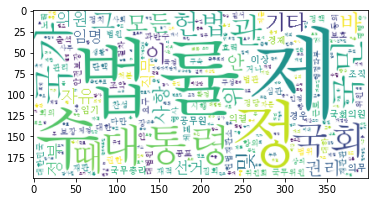

In [18]:
import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation='bilinear')
plt.show()

### 2. stopword 제거하기


* stopword란? 불용어
    - 의미가 없는 토큰
    - 의미가 없다? 자주 등장 (I, me, my, 그리고 조사 등등)
    - pop()을 활용하여 count_noun에서 제거
    

* most_common() & pop() 이용
    - 눈으로 직접 확인 후, 직접 pop() 하기

In [19]:
count_noun.most_common(20)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55),
 ('헌법', 53),
 ('그', 47),
 ('이', 38),
 ('모든', 37),
 ('바', 37),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21)]

In [20]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

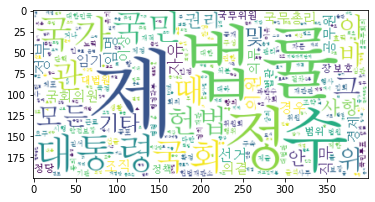

In [21]:
import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation='bilinear')
plt.show()

* 1글자로 이루어진 단어 제거

    - len(noun_word) == 1을 이용하여, 1글자 단어 추출하기

In [22]:
# 1글자로 이루어진 단어 제거하기

stopword_list = []

for noun_word in count_noun:
    if len(noun_word) == 1:
        stopword_list.append(noun_word)

stopword_list[:5]

['법', '입', '애', '안', '밖']

In [23]:
# 1글자인 단어를 모두 pop()

for stopword in stopword_list:
    count_noun.pop(stopword)

In [24]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

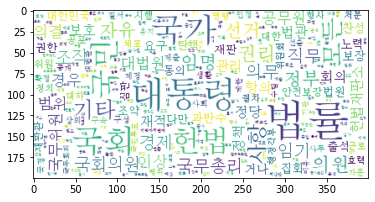

In [25]:
import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation='bilinear')
plt.show()

* stopwords = stopword_list
    - generate_from_frequencites()에서는 작동하지 않음
    - pop()으로 직접 제거

In [26]:
wc_noun = WordCloud(background_color='white',
                   max_words=2000, font_path=r'C:\Windows\Fonts\batang.ttc',
                   stopwords=stopword_list)

### 그림 안에 워드 클라우드 그리기


* wordcloud 객체 중 `mask` 활용


* Mask with image
    - image mask 안에 단어 넣기
    - 검은색: 단어가 들어가는 부분 / 흰색: background color 적용
    
    
* mask 이용하기
    - 이미지 파일을 준비
    - 이미지를 mask인 numpy arrya로 만들기 위해, Image.open과 numpy.array 이용
    - 복잡하지 않은 이미지의 경우, mask의 형태로 자동으로 만들어서 워드 클라우드 생성

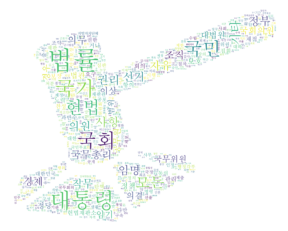

In [27]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('law.jpg'))

wc_img = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\batang.ttc', mask=img_mask)
wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation='bilinear')
plt.axis('off')
plt.show()